# Abordagem ML tradicional

##  Diabetes com Scikit-Learn

Este notebook irá mostrar como construir um modelo de machine learning para prever a presença de diabetes com base em um conjunto de dados clínicos. Usaremos o **Scikit-learn**, uma poderosa biblioteca para machine learning em Python, para construir e avaliar o modelo. O conjunto de dados utilizado é o **diabetes dataset** disponibilizado pelo próprio Scikit-learn.

## Objetivo do Projeto

O objetivo deste projeto é construir um modelo de classificação para prever se um paciente tem diabetes ou não, com base em características médicas, como a idade, a pressão sanguínea, os níveis de glicose, entre outras. O conjunto de dados é um exemplo clássico utilizado para fins educativos em ciência de dados.



- ## Imports das bibliotecas

In [56]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

- ## Carregamento dos dados

A biblioteca scikit-learn apresenta diversos datasets de exemplo para teste

In [2]:
diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## EDA básico

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [13]:
df_corr = df.copy()

df_corr["target"] = target

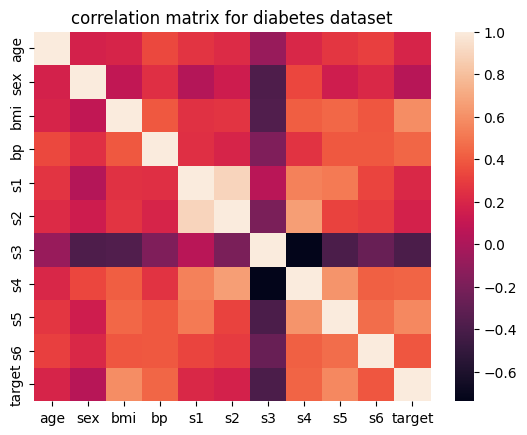

In [25]:
fig = plt.figure()

sns.heatmap(df_corr.corr())

plt.title("correlation matrix for diabetes dataset")

plt.show()

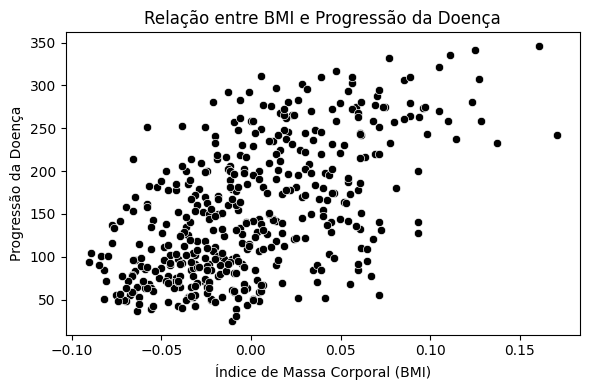

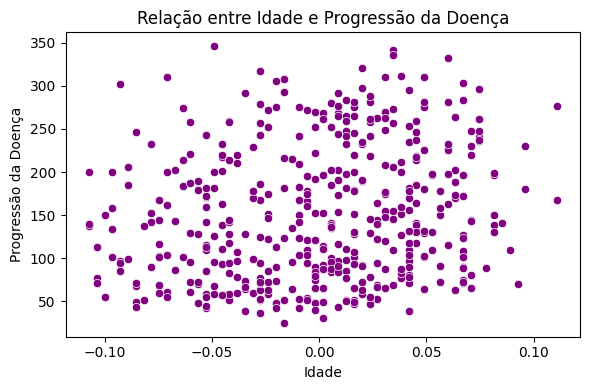

In [28]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_corr, x='bmi', y='target', color = "black")
plt.title('Relação entre BMI e Progressão da Doença')
plt.xlabel('Índice de Massa Corporal (BMI)')
plt.ylabel('Progressão da Doença')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_corr, x='age', y='target', color="purple")
plt.title('Relação entre Idade e Progressão da Doença')
plt.xlabel('Idade')
plt.ylabel('Progressão da Doença')
plt.tight_layout()
plt.show()

- Conclusões EDA

Parece haver uma correlação entre o BMI (indice de massa corporal) e a variável alvo.
Algumas outras features não possuem uma correlação forte, vamos estudar a retirada delar no futuro

## Pré-processamento dos dados

In [33]:
X = diabetes.data
y = diabetes.target

In [34]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

- ## Experimento de baseline - sem mlflow

In [39]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Avaliando o modelo usando cross val score

In [53]:
scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error",cv = 10)

tree_rmse_score = np.sqrt(-scores)

In [54]:
tree_rmse_score

array([90.86461235, 76.39328068, 71.85212086, 87.4781791 , 77.40228444,
       80.60016355, 76.77342698, 85.37910113, 97.03794946, 80.54332544])

In [60]:
y_pred = tree_reg.predict(X_test)

rmse_tree_reg_ver1 = round(root_mean_squared_error(y_test, y_pred),2)

print(rmse_tree_reg_ver1)

70.03


- ## Experimento usando mlflow

In [ ]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Define o experimento (sem "with")
mlflow.set_experiment("dec_tree_")

with mlflow.start_run():

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)

    y_pred = tree_reg.predict(X_test)

    train_score = tree_reg.score(X_train, y_train)  
    test_score = tree_reg.score(X_test, y_test)     
    rmse = root_mean_squared_error(y_test, y_pred)

    mlflow.log_metric("train_score_r2", train_score)
    mlflow.log_metric("test_score_r2", test_score)
    mlflow.log_metric("test_rmse", rmse)

    input_example = X_train
    signature = infer_signature(X_train, tree_reg.predict(X_train))

    mlflow.sklearn.log_model(
        tree_reg,
        artifact_path="model",
        input_example=input_example,
        signature=signature
    )

2025/04/21 21:38:38 INFO mlflow.tracking.fluent: Experiment with name 'dec_tree_ver0' does not exist. Creating a new experiment.


🏃 View run delightful-stoat-272 at: http://127.0.0.1:5000/#/experiments/955144386562632705/runs/e15ac8321ae948308edf769a26f0c0ff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/955144386562632705
